In [0]:
!kill -9 -1

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloadedTest = drive.CreateFile({'id':'1rGfRRaEqKAT0EwyF8uZRTDbfVBDajiE_'}) # replace the id with id of file you want to access
downloadedTest.GetContentFile('test.csv')  

downloadedTrain = drive.CreateFile({'id':'14rKrVfwK_Q0YeDnCknCF9N5Gz-m5502U'}) # replace the id with id of file you want to access
downloadedTrain.GetContentFile('train.csv')

downloadedValidation = drive.CreateFile({'id':'16kjxp9JOgUVExDHlcTGGS4eGjoYP6m0N'}) # replace the id with id of file you want to access
downloadedValidation.GetContentFile('validation.csv')

In [2]:
ls

datalab/  test.csv  train.csv  validation.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [0]:
#Read file as panda dataframe
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')

In [5]:
print(train.shape)
print(list(train.columns))

(2430981, 25)
['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag']


In [6]:
#Cell to test different columns for number of unique values:
train['usertag'].unique().shape
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        float64
domain            object
url               object
urlid             float64
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: float64(2), int64(11), object(12)
memory usage: 463.7+ MB


In [0]:
#SPLIT OS AND BROWSER:

train['OS'] = train['useragent'].apply( lambda x: x.split('_')[0] )
train['browser'] = train['useragent'].apply( lambda x: x.split('_')[1] )

validation['OS'] = validation['useragent'].apply( lambda x: x.split('_')[0] )
validation['browser'] = validation['useragent'].apply( lambda x: x.split('_')[1] )



In [0]:
#DROP COLUMNS THAT HAD TOO MANY UNIQUE VALUES AND USER AGENT
train =           train.drop(['useragent','bidid', 'userid','IP','url','urlid','slotid','domain','city','creative','bidprice','payprice'], axis=1)
validation = validation.drop(['useragent','bidid', 'userid','IP','url','urlid','slotid','domain','city','creative','bidprice','payprice'], axis=1)


In [10]:
print(validation.shape)
print(train.shape)

(303925, 15)
(2430981, 15)


In [11]:
#Count of clicks Vs. non-clicks
train['click'].value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [0]:
#Use a negative downsampling rate of 2.5% as suggested by the #Predicting Facebook Clicks
train_majority = train[train.click==0]
train_minority = train[train.click==1]

#Downsample Majority Class
train_majority_downsampled = resample(train_majority,
                                     replace=False,
                                     n_samples=60730,
                                     random_state=123) #Random State for Reproducibility

#Combine Downsampled majority with minority
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled.click.value_counts()
train_downsampled = shuffle(train_downsampled,random_state=123) #Random State for Reproducibility

In [0]:
#Hot encode and obtain individual values for usertag
train_downsampled['usertag'] = train_downsampled['usertag'].str.split(',')
train_downsampled_usertags = train_downsampled['usertag'].str.join('@').str.get_dummies('@').add_prefix('usertags_')
train_downsampled = pd.concat([train_downsampled, train_downsampled_usertags], axis=1)
train_downsampled = train_downsampled.drop(['usertag'], axis=1)

In [0]:
validation['usertag'] = validation['usertag'].str.split(',')
validation_usertags = validation['usertag'].str.join('@').str.get_dummies('@').add_prefix('usertags_')
validation = pd.concat([validation, validation_usertags], axis=1)
validation = validation.drop(['usertag'], axis=1)

In [0]:
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(train_downsampled[var], prefix=var)
  train_downsampled1=train_downsampled.join(cat_list)
  train_downsampled=train_downsampled1
  
  #@title Default title text
#Hot Encode!
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
data_vars=train_downsampled.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

hotETrain=train_downsampled[to_keep]


In [16]:
print(list(hotETrain.columns))

['click', 'slotprice', 'usertags_10006', 'usertags_10024', 'usertags_10031', 'usertags_10048', 'usertags_10052', 'usertags_10057', 'usertags_10059', 'usertags_10063', 'usertags_10067', 'usertags_10074', 'usertags_10075', 'usertags_10076', 'usertags_10077', 'usertags_10079', 'usertags_10083', 'usertags_10093', 'usertags_10102', 'usertags_10110', 'usertags_10111', 'usertags_10114', 'usertags_10115', 'usertags_10116', 'usertags_10117', 'usertags_10118', 'usertags_10120', 'usertags_10123', 'usertags_10125', 'usertags_10126', 'usertags_10127', 'usertags_10129', 'usertags_10130', 'usertags_10131', 'usertags_10133', 'usertags_10138', 'usertags_10140', 'usertags_10142', 'usertags_10145', 'usertags_10146', 'usertags_10147', 'usertags_10148', 'usertags_10149', 'usertags_10684', 'usertags_11092', 'usertags_11278', 'usertags_11379', 'usertags_11423', 'usertags_11512', 'usertags_11576', 'usertags_11632', 'usertags_11680', 'usertags_11724', 'usertags_11944', 'usertags_13042', 'usertags_13403', 'user

In [0]:
#Hot Encode!
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(validation[var], prefix=var)
  validation1=validation.join(cat_list)
  validation=validation1
  
  #@title Default title text
#Hot Encode!
cat_vars=['weekday','hour','OS','browser','adexchange','slotwidth','slotheight','slotvisibility','slotformat','advertiser','region','keypage']
data_vars=validation.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

hotEValidation=validation[to_keep]

In [0]:
temp = pd.get_dummies(pd.concat([hotETrain,hotEValidation],keys=[0,1]))
hotETrain,hotEValidation = temp.xs(0),temp.xs(1)


In [0]:
data_hotEncodedTrain = hotETrain.fillna(0)
data_hotEncodedValidation = hotEValidation.fillna(0)

In [20]:
print(data_hotEncodedTrain.shape)
print(data_hotEncodedValidation.shape)

(62523, 232)
(303925, 232)


In [0]:
cols = list(data_hotEncodedTrain)
cols.insert(0,cols.pop(cols.index('click')))
data_hotEncodedTrain = data_hotEncodedTrain.loc[:,cols]

cols2 = list(data_hotEncodedValidation)
cols2.insert(0,cols2.pop(cols2.index('click')))
data_hotEncodedValidation = data_hotEncodedValidation.loc[:,cols2]

In [0]:
data_final_vars=data_hotEncodedTrain.columns.values.tolist()
y=['click']
X=[i for i in data_final_vars if i not in y]

In [0]:
XTrain = data_hotEncodedTrain[X]
yTrain = data_hotEncodedTrain['click']
XValidation = data_hotEncodedValidation[X]
yValidation = data_hotEncodedValidation['click']

In [24]:
XValidation.shape

(303925, 231)

In [25]:
X_train=XTrain
y_train=yTrain
X_test = XValidation
y_test = yValidation
print(y_test.shape)
print(X_test.shape)

(303925,)
(303925, 231)


In [0]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [0]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
  print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
  # instantiate model
  model = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')
  
  # train model
  model.fit(X_train, y_train)
  
  # get a (not-very-useful) sense of performance
  accuracy = model.score(X_train, y_train)
  print(f"In-sample accuracy: {accuracy:0.2%}")
  
  y_pred = model.predict(X_test)
  
  confusion_matrix2 = confusion_matrix(y_test, y_pred)
  print(confusion_matrix2)
  
  print(classification_report(y_test, y_pred))
   
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
    
  return model

In [0]:
for i in Estimators:
  for j in maxFeatures:
    for k in maxDepth:
      hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test)

  Estimators =100          Maximum Features =None         Maximum Depth =None
In-sample accuracy: 99.80%
[[302402   1321]
 [   128     74]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    303723
          1       0.05      0.37      0.09       202

avg / total       1.00      1.00      1.00    303925



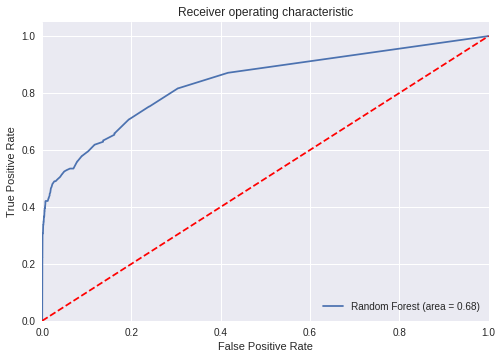

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [27]:
#BEST ESTIMATORS:
#Estimators =100          Maximum Features =None         Maximum Depth =None
#In-sample accuracy: 99.80%
#[[302402   1321]
# [   128     74]

hyperparameterTuneRandomForest(100,None,None,X_train,y_train,X_test,y_test)

In [0]:
#Export Predicted Probabilities to CSV FOR USE IN BIDDING STRATEGY IN ANOTHER NOTEBOOK:

model = XGBClassifier(max_depth=5,learning_rate=0.1, n_estimators=100,random_state=123)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)
#predictions = [round(value) for value in y_pred]

In [0]:
y_pred1 = y_pred[:,[1]]

In [0]:
y_pred1

array([[0.00494914],
       [0.00550708],
       [0.0040477 ],
       ...,
       [0.03908715],
       [0.01458392],
       [0.01128349]], dtype=float32)

In [0]:
#Code to import for bidding strategies
pCTR = pd.DataFrame(y_pred1).to_csv('pCTR.csv')

In [0]:
#code to import for bidding strategies
from google.colab import files

files.download('pCTR.csv')